## Import required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
print('Libraries Imported!')

Libraries Imported!


In [2]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries Imported!')

Libraries Imported!


## Data Extraction

In [3]:
df_data_1 = pd.read_csv("AB_NYC_2019.csv")
df_data_1.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Data Analysis

In [4]:
dfgroup = df_data_1.groupby('neighbourhood_group').count()['id']
dfgroup.head()


neighbourhood_group
Bronx             1091
Brooklyn         20104
Manhattan        21661
Queens            5666
Staten Island      373
Name: id, dtype: int64

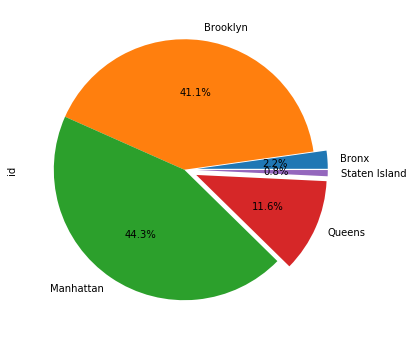

In [33]:
import matplotlib.pyplot as plt
explode_list = [0.1, 0, 0, 0.1, 0.1]
dfgroup.plot(kind ='pie', autopct='%1.1f%%', figsize=(15, 6), explode=explode_list)
plt.show()


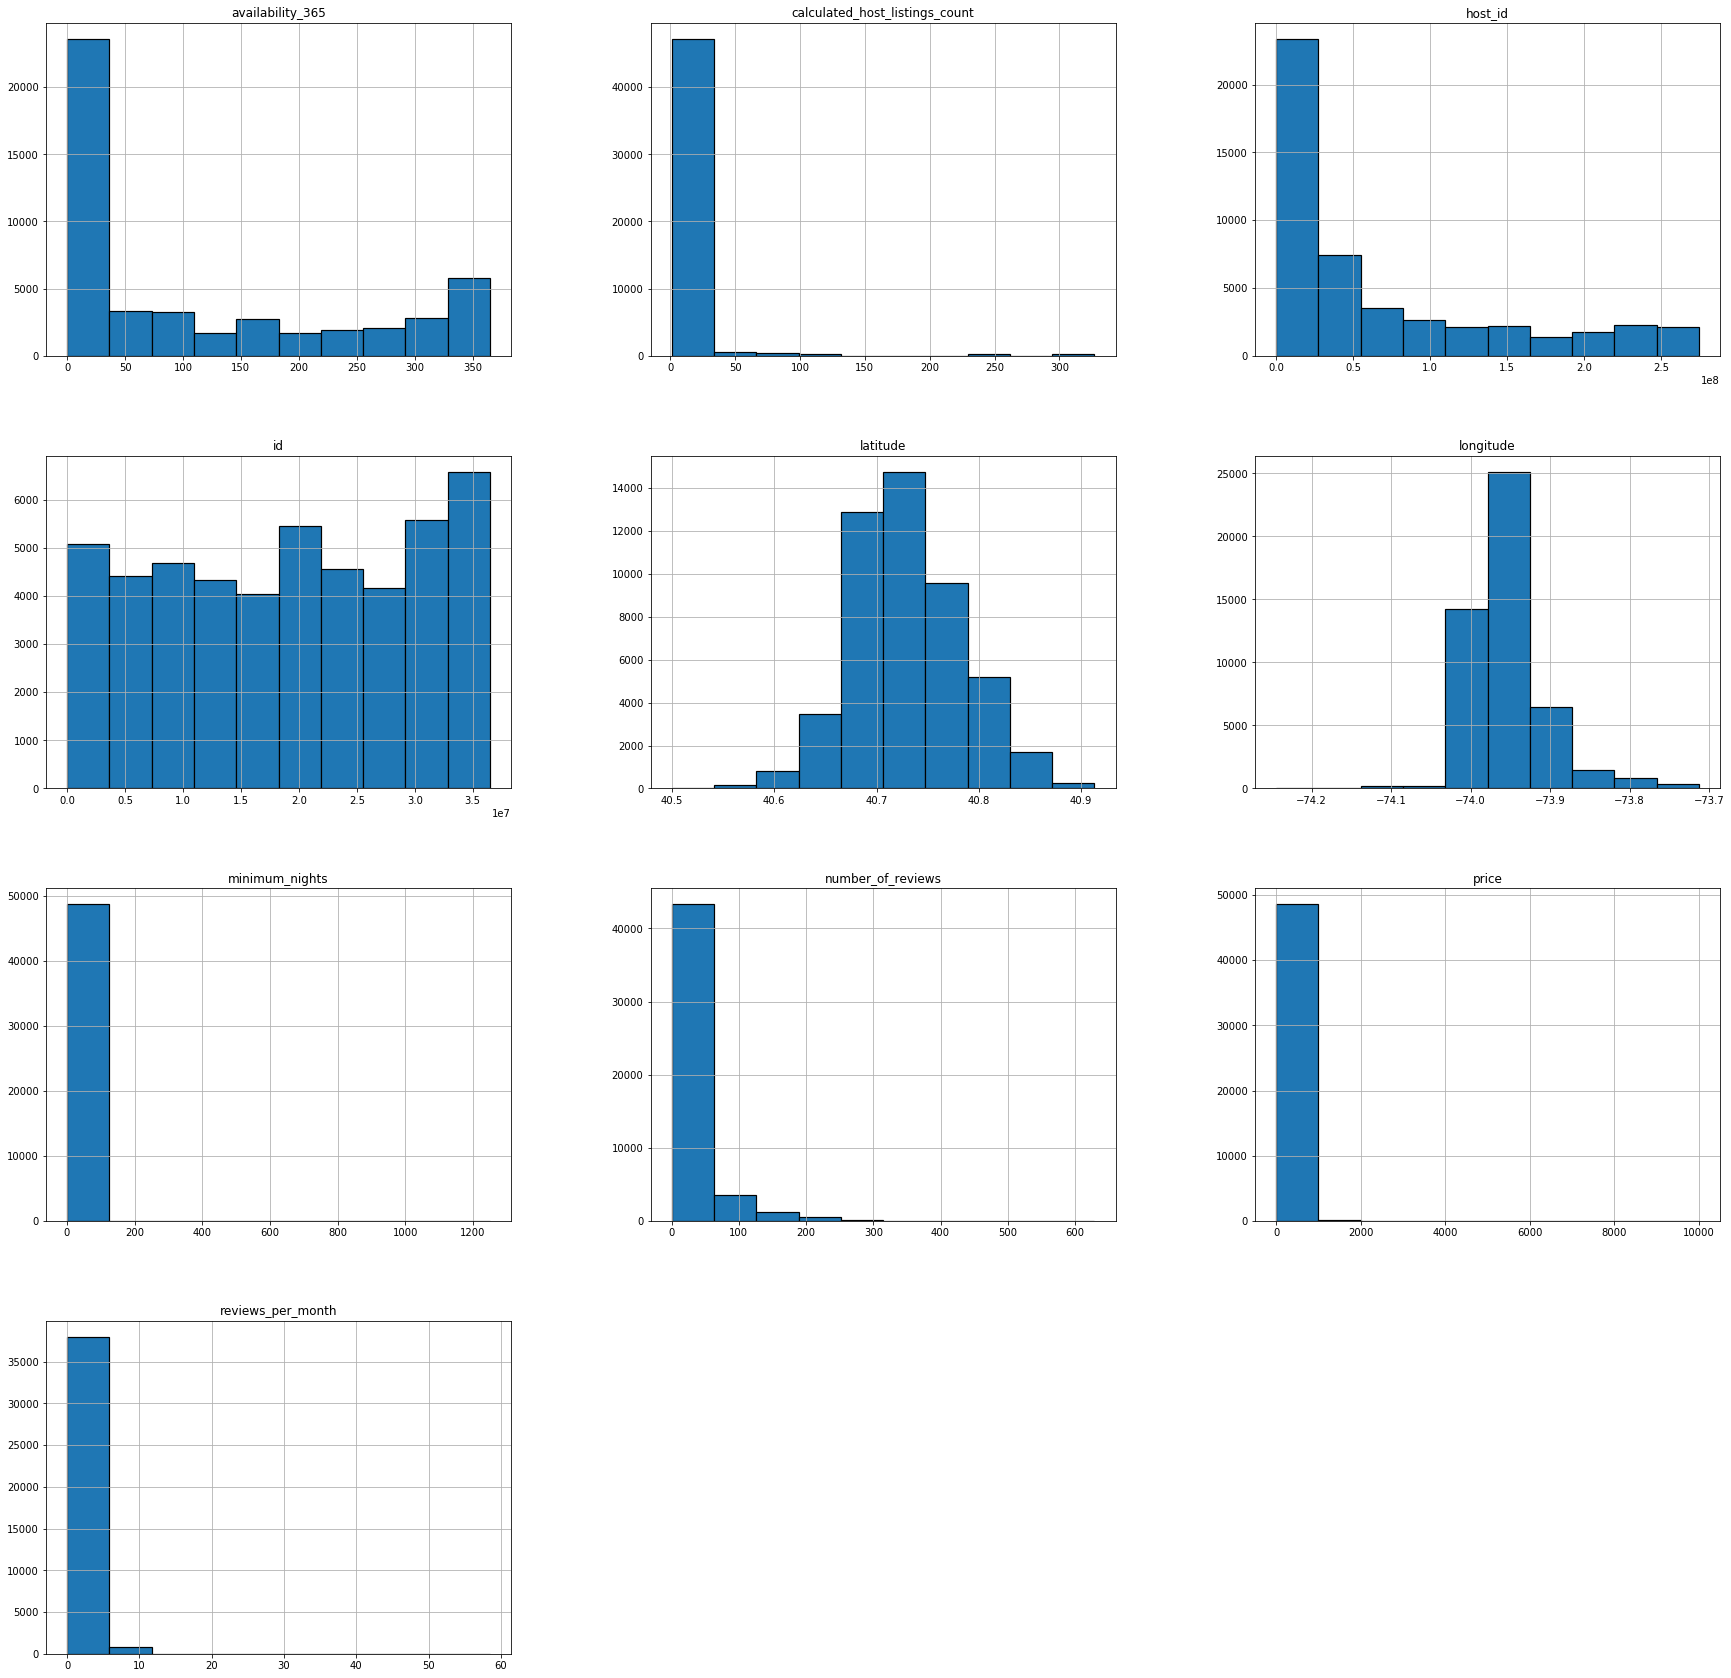

In [6]:
# Visualizing the distribution for every "feature"
df_data_1.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30));

In [7]:
df_data_1.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Places received high reviews from each neighbourhood group

In [8]:
df_data_1.iloc[df_data_1.groupby('neighbourhood_group')['number_of_reviews'].agg(pd.Series.idxmax)].sort_values(by='number_of_reviews', ascending=False)[['name','host_id','number_of_reviews','neighbourhood_group','neighbourhood','price','reviews_per_month','calculated_host_listings_count']]


,name,host_id,number_of_reviews,neighbourhood_group,neighbourhood,price,reviews_per_month,calculated_host_listings_count
11759,Room near JFK Queen Bed,47621202,629,Queens,Jamaica,47,14.58,2
2031,Great Bedroom in Manhattan,4734398,607,Manhattan,Harlem,49,7.75,3
4870,Private brownstone studio Brooklyn,12949460,488,Brooklyn,Park Slope,160,8.14,1
256,D Private Che@p Room 2 Explore NYC,303939,333,Staten Island,Tompkinsville,36,3.19,6
5260,Cozy Private Bedroom,19533769,321,Bronx,Mott Haven,53,5.46,1


## Filter Data in Queens Region

In [9]:
Condition = df_data_1['neighbourhood_group']=='Queens'
dfQueens = df_data_1[Condition]
dfQueens.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
46,12937,"1 Stop fr. Manhattan! Private Suite,Landmark B...",50124,Orestes,Queens,Long Island City,40.74771,-73.94740,Private room,130,3,248,2019-07-01,2.25,1,215
77,18198,Little King of Queens,70091,Justin,Queens,Woodside,40.75038,-73.90334,Private room,70,30,25,2019-05-31,0.22,1,324
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1
161,39593,"A room w/ a Manhattan view, longer stay",110506,Myung,Queens,Sunnyside,40.74559,-73.92313,Private room,79,30,28,2019-04-12,0.26,1,126
181,45910,Beautiful Queens Brownstone! - 5BR,204539,Mark,Queens,Ridgewood,40.70382,-73.89797,Entire home/apt,350,8,10,2019-05-12,0.11,5,365


## Number of Reviews vs Price

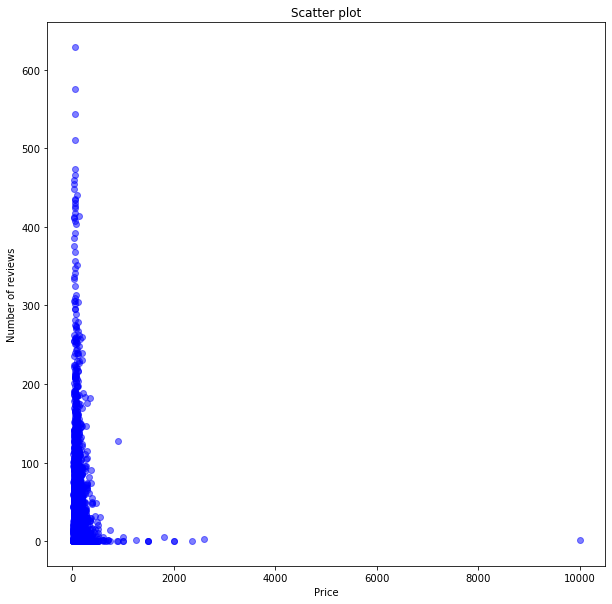

<Figure size 432x288 with 0 Axes>

In [28]:

# Create data
N = 500
x = dfQueens['price']
y = dfQueens['number_of_reviews']

# Plot
plt.figure(figsize=(10,10))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.title('Scatter plot')
plt.xlabel('Price')
plt.ylabel('Number of reviews')
plt.show()
plt.savefig('scatterplot.png')

## Choropleth map to show expensive areas

In [11]:
address = 'NewYork City, NYC'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Manhattan are 40.710314600000004, -74.00496498730675.


In [23]:
state_geo = 'https://raw.githubusercontent.com/fedhere/PUI2015_EC/master/mam1612_EC/nyc-zip-code-tabulation-areas-polygons.geojson' # geojson file

# create a plain world map
state_map =folium.Map(location=[latitude, longitude], zoom_start=11)

state_map.choropleth(
    geo_data=state_geo,
    data=dfQueens,
    columns=['neighbourhood','price'],
    key_on='feature.properties.PO_NAME',
    fill_color='YlGn', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Price in Queen neighbourhood'
)

# display map
state_map


In [13]:
#Room near JFK Queen Bed
condition = dfQueens['host_id']==47621202
dffilter = dfQueens[condition]
dffilter.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173


In [14]:
dfQueens.sort_values(by='number_of_reviews', ascending=False).head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
11759,9145202,Room near JFK Queen Bed,47621202,Dona,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,2019-07-05,14.58,2,333
13495,10101135,Room Near JFK Twin Beds,47621202,Dona,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,2019-06-27,13.40,2,173
10623,8168619,Steps away from Laguardia airport,37312959,Maya,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,2019-07-01,11.59,5,163
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341
1271,546383,My Little Guest Room in Flushing,2680820,Linda,Queens,Flushing,40.75578,-73.81948,Private room,55,1,474,2019-05-25,5.53,3,332


In [15]:
dfQueens.sort_values(by='price', ascending=False).head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
42680,33133321,Majestic Mansion LifeStyle :),74373729,Shah,Queens,Bayside,40.77811,-73.77069,Entire home/apt,2600,6,3,2019-05-30,1.73,1,362
17811,13963005,Gorgeous 2 Bedroom apartment,41870118,Iveta,Queens,Forest Hills,40.72064,-73.83746,Entire home/apt,2350,365,0,NaN,NaN,1,364
47350,35706068,wait until later,35741633,Chen,Queens,Long Island City,40.74869,-73.94294,Entire home/apt,2000,1,0,NaN,NaN,1,365
44429,34221161,Room with sofa bed or air mattress,9295237,Noelle,Queens,Astoria,40.75593,-73.91276,Private room,2000,365,0,NaN,NaN,2,0


In [16]:
# install wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Solving environment: done

# All requested packages already installed.

Wordcloud is installed and imported!


In [17]:
max_words = 90
word_string = ''
for name in dfQueens.name:
    word_string = word_string + ((name + ' '))
                                     
# display the generated text
#word_string

In [18]:
stopwords = set(STOPWORDS)
stopwords.add('Apartment')
stopwords.add('Queen')
stopwords.add('room')
# create the word cloud
wordcloud = WordCloud(background_color='white',stopwords=stopwords).generate(word_string)

print('Word cloud created!')

Word cloud created!


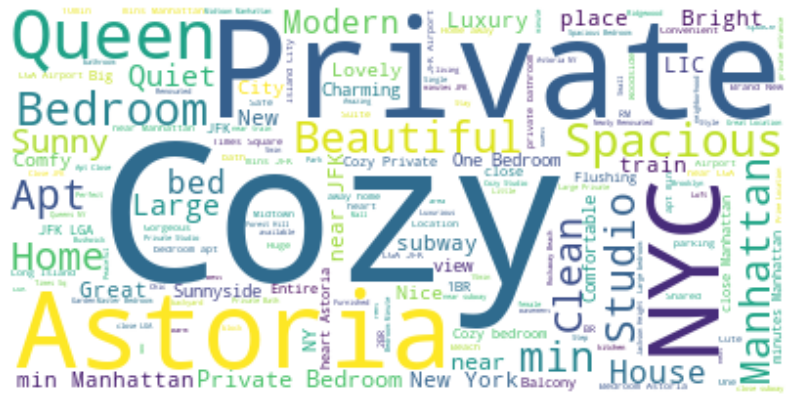

<Figure size 432x288 with 0 Axes>

In [20]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
plt.savefig('wordcloud.png')

## Insights

1. Room near JFK Queen Bed is better place with high number of reviews and less price.
2. Furnished room in Astoria apartment is highly expensive place in Queens nighbourhood group.
3. Price and number of views are related. Less expensive places got many reviews when compared to high expensive. Scatter plot explains the fact.

## Interesting places to visit 

In [35]:
import requests
CLIENT_ID = 'N5GNL01ZNGDIEY0ZUUDMTKKQNIPKU250DYAVNDQWQYMQSKH1' # your Foursquare ID
CLIENT_SECRET = 'QTOOZZE31PFKLIG14BY4IU4VIFXHCXGPKF4RN1W2TY4BSBMV' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 50
radius =500
search_query=''
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=N5GNL01ZNGDIEY0ZUUDMTKKQNIPKU250DYAVNDQWQYMQSKH1&client_secret=QTOOZZE31PFKLIG14BY4IU4VIFXHCXGPKF4RN1W2TY4BSBMV&ll=40.710314600000004,-74.00496498730675&v=20180604&query=&radius=500&limit=50'

In [37]:
results = requests.get(url).json()

In [44]:
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
# assign relevant part of JSON to venues
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  import sys


In [45]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]
dataframe_filtered.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,cc,city,state,country,formattedAddress,neighborhood,id
0,NewYork-Presbyterian-Lower Manhattan Hospital,Hospital,170 William St,at Gold St,40.709917,-74.004758,"[{'label': 'display', 'lat': 40.7099166, 'lng'...",47,10038,US,New York,NY,United States,"[170 William St (at Gold St), New York, NY 100...",NaN,4a82ef0af964a52092f91fe3
1,Faraj Falafel & Shawarma,Falafel Restaurant,165 Church St,NaN,40.710327,-74.005014,"[{'label': 'display', 'lat': 40.71032676216792...",4,10007,US,New York,NY,United States,"[165 Church St, New York, NY 10007, United Sta...",NaN,4e4c4c81bd413c4cc6685350
2,Pace University,University,1 Pace Plz,btwn Nassau & Gold St,40.710720,-74.005743,"[{'label': 'display', 'lat': 40.71072012218008...",79,10038,US,New York,NY,United States,"[1 Pace Plz (btwn Nassau & Gold St), New York,...",NaN,49e7c7c6f964a5201b651fe3
3,Downtown Medical Association,Hospital,Beekman,William,40.710618,-74.004595,"[{'label': 'display', 'lat': 40.71061798723669...",45,10038,US,New York,NY,United States,"[Beekman (William), New York, NY 10038, United...",NaN,4ad76f73f964a520600a21e3
4,New York Downtown Orthopedic Associates,Doctor's Office,170 William St,NaN,40.710298,-74.005424,"[{'label': 'display', 'lat': 40.71029761795286...",38,10038,US,New York,NY,United States,"[170 William St, New York, NY 10038, United St...",Financial District,4e70b54aaeb7424433a5e451


In [43]:
dfgroup1 = dataframe_filtered.groupby('categories').count()['name']
dfgroup1

categories
Bakery                                      2
Building                                    1
College Academic Building                   1
College Administrative Building             2
College Cafeteria                           1
College Library                             1
College Residence Hall                      1
College Theater                             2
Deli / Bodega                               1
Doctor's Office                             8
Emergency Room                              1
Falafel Restaurant                          1
Fire Station                                1
Food Truck                                  1
General College & University                1
Government Building                         2
High School                                 1
Hospital                                    2
Italian Restaurant                          1
Medical Center                              2
Nightclub                                   1
Office                 